In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# load the preprocessed data
X_train = pd.read_pickle("X_train.pkl")
X_test = pd.read_pickle("X_test.pkl")
y_train = pd.read_pickle("y_train.pkl")
y_test = pd.read_pickle("y_test.pkl")


In [4]:
# combine train and test for feature engineering
X_full = pd.concat([X_train,X_test], axis = 0)
y_full = pd.concat([y_train,y_test], axis = 0)

In [7]:
# feature 1- room squared
X_full['rm_squared'] = X_full['rm']**2

In [9]:
# feature 2 crime rate * lower status
X_full['crim_lstat'] = X_full['crim'] * X_full['lstat']

In [13]:
# feature 3 Distance to employement features * Accessibility to highway
X_full['dis_rad'] = X_full['dis'] * X_full['rad']

In [14]:
# Check the new features
print("New features added:")
print(X_full[['rm_squared', 'crim_lstat', 'dis_rad']].head())

New features added:
     rm_squared  crim_lstat   dis_rad
55     0.016944   -0.139998 -0.034954
229    1.982018    0.461944  2.590730
69     0.223289    0.311241  1.174879
168    0.001116    0.268298 -0.090502
109    0.035115    1.954593  0.594059


In [16]:
# Split back into train and test 
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

In [17]:
#  Test Different Feature Combinations 
# Baseline: Original features only
lr_baseline = LinearRegression()
lr_baseline.fit(X_train, y_train)
y_pred_baseline = lr_baseline.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
r2_baseline = r2_score(y_test, y_pred_baseline)

# Model 1: Original + rm_squared
features_1 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'rm_squared']
lr_model_1 = LinearRegression()
lr_model_1.fit(X_train_new[features_1], y_train_new)
y_pred_1 = lr_model_1.predict(X_test_new[features_1])
mse_1 = mean_squared_error(y_test_new, y_pred_1)
r2_1 = r2_score(y_test_new, y_pred_1)

# Model 2: Original + rm_squared + crim_lstat
features_2 = features_1 + ['crim_lstat']
lr_model_2 = LinearRegression()
lr_model_2.fit(X_train_new[features_2], y_train_new)
y_pred_2 = lr_model_2.predict(X_test_new[features_2])
mse_2 = mean_squared_error(y_test_new, y_pred_2)
r2_2 = r2_score(y_test_new, y_pred_2)

# Model 3: All new features
features_3 = features_2 + ['dis_rad']
lr_model_3 = LinearRegression()
lr_model_3.fit(X_train_new[features_3], y_train_new)
y_pred_3 = lr_model_3.predict(X_test_new[features_3])
mse_3 = mean_squared_error(y_test_new, y_pred_3)
r2_3 = r2_score(y_test_new, y_pred_3)

In [18]:
# Evaluate Impact 
print("\nModel Performance Comparison:")
print(f"Baseline (Original Features): MSE = {mse_baseline:.2f}, R-squared = {r2_baseline:.2f}")
print(f"Model 1 (Original + rm_squared): MSE = {mse_1:.2f}, R-squared = {r2_1:.2f}")
print(f"Model 2 (Original + rm_squared + crim_lstat): MSE = {mse_2:.2f}, R-squared = {r2_2:.2f}")
print(f"Model 3 (All New Features): MSE = {mse_3:.2f}, R-squared = {r2_3:.2f}")



Model Performance Comparison:
Baseline (Original Features): MSE = 5.94, R-squared = 0.72
Model 1 (Original + rm_squared): MSE = 4.72, R-squared = 0.76
Model 2 (Original + rm_squared + crim_lstat): MSE = 4.66, R-squared = 0.77
Model 3 (All New Features): MSE = 4.90, R-squared = 0.75


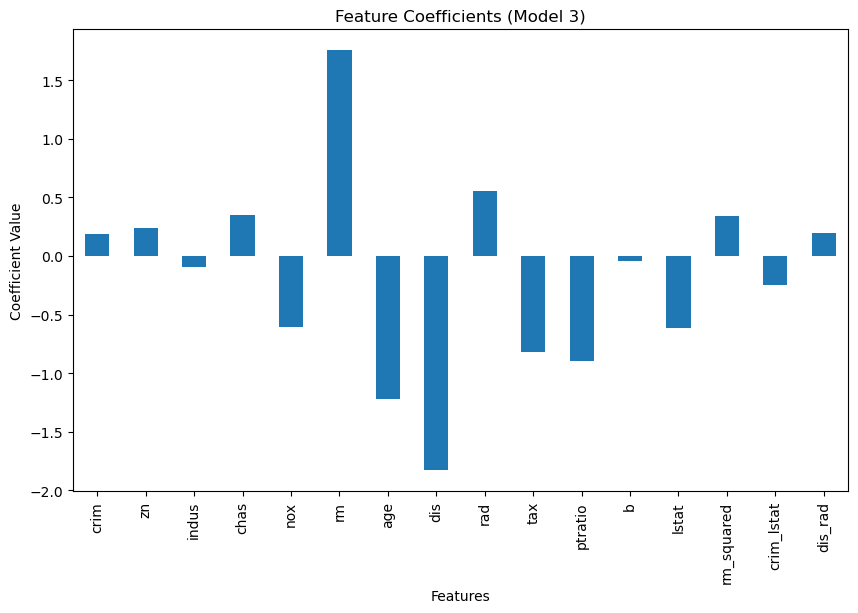

In [19]:

#Visualize feature importance 
plt.figure(figsize=(10, 6))
coefs = pd.Series(lr_model_3.coef_, index=features_3)
coefs.plot(kind='bar')
plt.title("Feature Coefficients (Model 3)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()